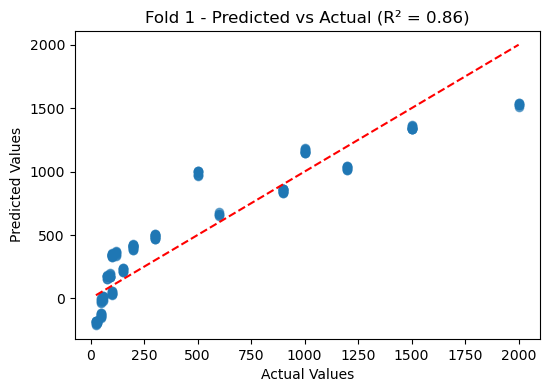

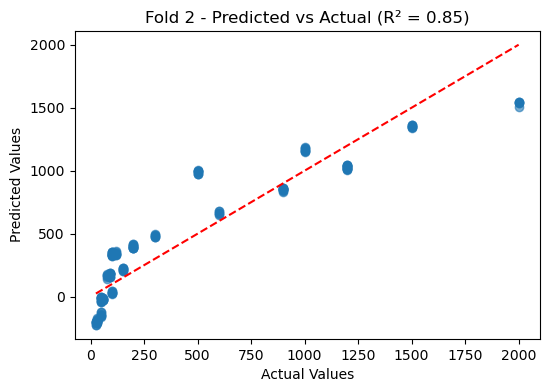

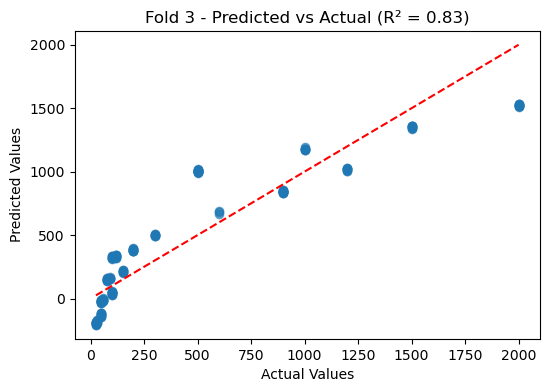

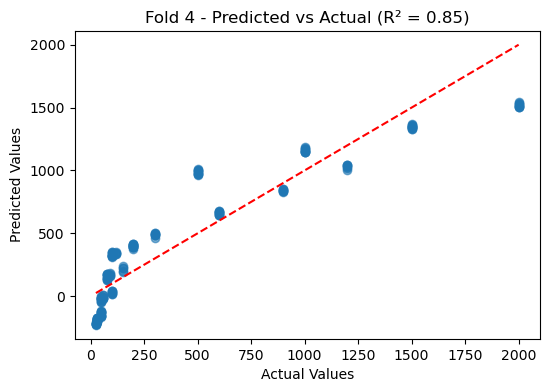

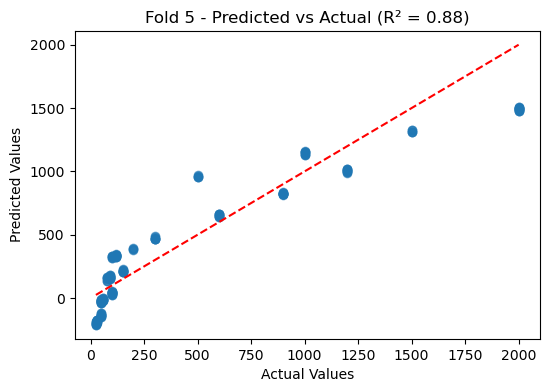

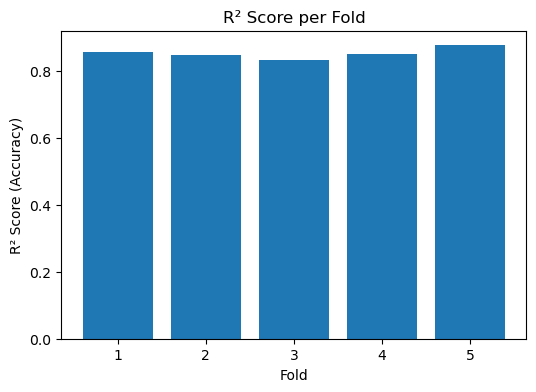

Fold Scores: [0.856877226425043, 0.8477095594142201, 0.8320908407818838, 0.8507717200821001, 0.8761040765555648]
Average Fold (Accuracy): 0.8527106846517624


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv("retail_sales_dataset.csv")

X = data[["Age", "Quantity", "Price per Unit"]]
y = data["Total Amount"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

r2_scores = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Fold {fold} - Predicted vs Actual (R² = {r2:.2f})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    fold += 1

plt.figure(figsize=(6,4))
plt.bar(range(1, len(r2_scores)+1), r2_scores)
plt.xlabel("Fold")
plt.ylabel("R² Score (Accuracy)")
plt.title("R² Score per Fold")
plt.show()

print("Fold Scores:", r2_scores)
print("Average Fold (Accuracy):", sum(r2_scores)/len(r2_scores))
